# **Problem Statement**
In an increasingly dynamic financial landscape, XYZ Financial Services, a leading commercial bank, faces the critical challenge of accurately predicting credit risk. The goal of this project is to develop a predictive model that estimates the probability of credit default based on credit card owners' characteristics, such as age, gender, education, marital status, credit limit, and payment history. By accurately predicting default probabilities, XYZ Financial Services can make informed lending decisions, optimize risk management strategies, and enhance financial stability.

## **Dataset Information**
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- **Dataset Name and Source**
    - **Name:** UCI_Credit_Card.csv
    - **Source:** This dataset is originally from the UCI Machine Learning Repository. ([Dataset source link](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset))
    - **Number of Instances (Rows):** 30,000
    - **Number of Attributes (Columns):** 25

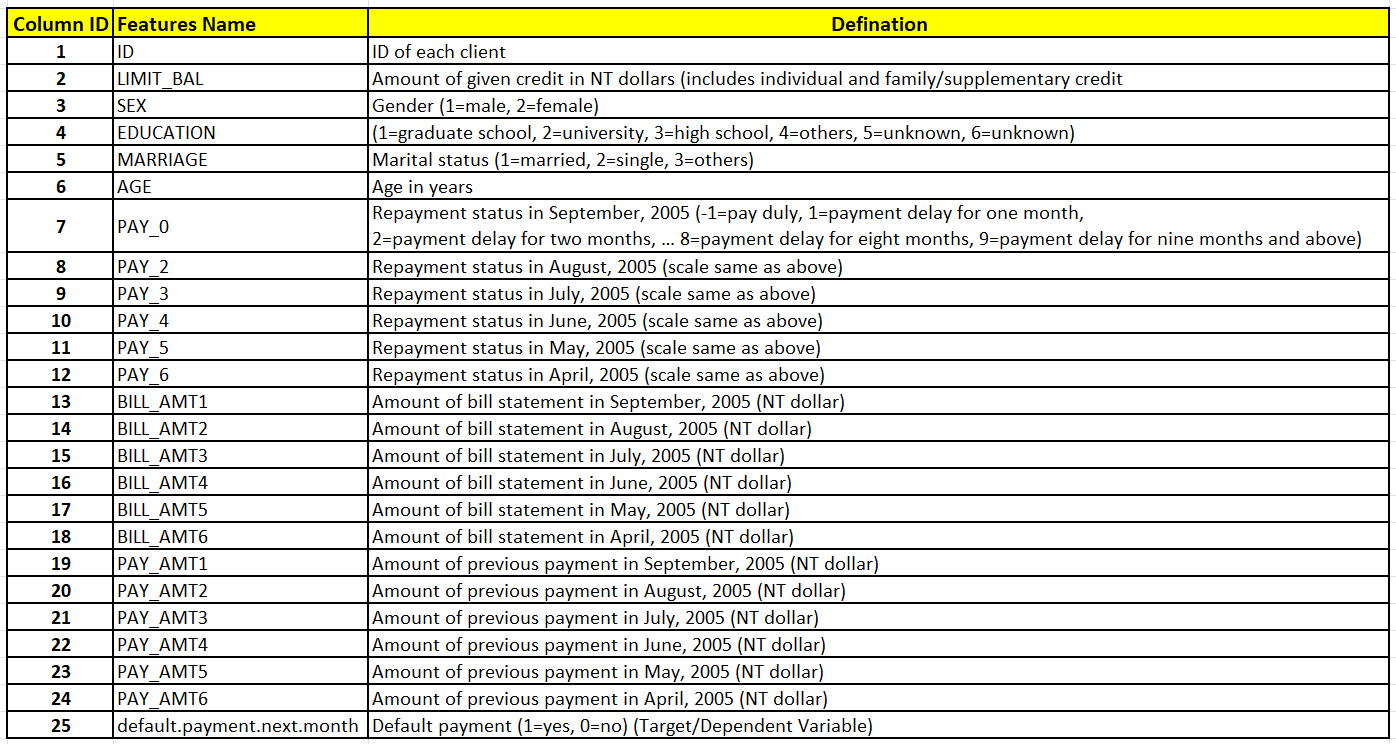

In [2]:
# Displaying all features information
import os
from IPython.display import Image

data_dir = "datasets"
image_path = os.path.join(data_dir, "Dataset Information.png")
Image(filename=image_path)

## **Target Variable**
- **default.payment.next.month**: A binary variable indicating whether a credit card owner will default on their payment in the next month (1 = default, 0 = no default), as provided in the UCI Credit Card dataset.

## **Requirements**
- **Binary Classification**: The model should classify credit card clients into two categories: those who will default on their payment in the next month and those who will not.
- **Performance Metrics**: The model's performance should be evaluated using appropriate metrics for binary classification, such as Accuracy, Precision, Recall, F1-Score, ROC-AUC, and Confusion Matrix, to ensure a comprehensive understanding of its effectiveness in identifying defaults while minimizing false negatives.
- **Business Goal**: The predictions should enable XYZ Financial Services to identify high-risk credit clients and tailor risk mitigation strategies, such as adjusting credit limits or offering targeted financial counseling, to reduce default rates and improve portfolio health.

In [3]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **1. Understanding the Data**
In this section, we will load the dataset and explore its structure to understand the features and target

## **1.1 Loading the Dataset**

In [4]:
# Defining the path to the datasets folder
dataset_path = os.path.join(data_dir, "UCI_Credit_Card.csv")

# Loading the CSV file into a DataFrame
df = pd.read_csv(dataset_path)

# Displaying the first few rows to confirm loading
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## **1.2 Inspecting Dataset**

In [5]:
# Checking the number of rows and columns
df.shape

(30000, 25)

- The dataset is correctly loaded and contains 30,000 rows and 25 columns which exactly matches the expected dimensions given in the dataset information.

In [6]:
# Checking column names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

- All the column names are displayed correctly, and they match the expected names from the dataset information.

In [7]:
# Checking summary of data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

- All the columns have 30,000 non-null values, indicating that there are no missing values in the dataset.
- All columns have the correct data types, with 13 float64 columns, 12 int64 columns, which is consistent with the expected data types for the given attributes.

In [8]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(0)

- There are no duplicate rows in the dataset as we have `ID` column which is unique for each row.

## **Key observations from Dataset**
Based on the dataset and inspected structure:

The dataset contains `30000 credit card clients` with `25 attributes`, including demographic information, credit history, and payment behavior. The target variable is `default.payment.next.month`, indicating whether a client will default on their payment in the next month (1 = default, 0 = no default). The dataset has `no missing values` or `duplicate rows`, and all columns have the `correct data types`.

# **2. Understanding Variables**

In [9]:
# Renaming Columns names for clarity and consistency
column_renames = {
    'ID': 'ID',
    'LIMIT_BAL': 'Credit_Limit',
    'SEX': 'Gender',
    'EDUCATION': 'Education_Level',
    'MARRIAGE': 'Marital_Status',
    'AGE': 'Age',
    'PAY_0': 'Sept_Pay',
    'PAY_2': 'Aug_Pay',
    'PAY_3': 'July_Pay',
    'PAY_4': 'June_Pay',
    'PAY_5': 'May_Pay',
    'PAY_6': 'Apr_Pay',
    'BILL_AMT1': 'Sept_Bill_Amt',
    'BILL_AMT2': 'Aug_Bill_Amt',
    'BILL_AMT3': 'July_Bill_Amt',
    'BILL_AMT4': 'June_Bill_Amt',
    'BILL_AMT5': 'May_Bill_Amt',
    'BILL_AMT6': 'Apr_Bill_Amt',
    'PAY_AMT1': 'Sept_Pay_Amt',
    'PAY_AMT2': 'Aug_Pay_Amt',
    'PAY_AMT3': 'July_Pay_Amt',
    'PAY_AMT4': 'June_Pay_Amt',
    'PAY_AMT5': 'May_Pay_Amt',
    'PAY_AMT6': 'Apr_Pay_Amt',
    'default.payment.next.month': 'default_payment_next_month'
}

# Renaming the columns in the DataFrame
df = df.rename(columns=column_renames)

# Verifying the new column names
df.columns

Index(['ID', 'Credit_Limit', 'Gender', 'Education_Level', 'Marital_Status',
       'Age', 'Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay',
       'Apr_Pay', 'Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt',
       'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt', 'Sept_Pay_Amt',
       'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt',
       'Apr_Pay_Amt', 'default_payment_next_month'],
      dtype='object')

In [10]:
# Inspecting 10 random rows
df.sample(10)

,ID,Credit_Limit,Gender,Education_Level,Marital_Status,Age,Sept_Pay,Aug_Pay,July_Pay,June_Pay,...,June_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,July_Pay_Amt,June_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,default_payment_next_month
22568,22569,200000.0,1,2,1,32,1,2,0,0,...,54472.0,50540.0,46486.0,341.0,8024.0,5000.0,8000.0,1821.0,5000.0,0
2395,2396,110000.0,2,3,1,27,0,0,0,0,...,47316.0,47175.0,47141.0,2326.0,3000.0,1807.0,1698.0,1911.0,1808.0,0
13672,13673,180000.0,2,2,2,27,0,0,2,0,...,4853.0,3965.0,3310.0,2300.0,0.0,288.0,143.0,246.0,33.0,0
28531,28532,200000.0,2,1,1,40,2,2,2,2,...,85758.0,87003.0,89112.0,4200.0,4100.0,3000.0,3400.0,3500.0,0.0,1
2694,2695,30000.0,1,2,2,33,1,2,0,0,...,29304.0,28996.0,28970.0,0.0,1753.0,1200.0,1041.0,1194.0,1100.0,0
10643,10644,360000.0,2,3,1,38,1,2,2,0,...,21359.0,21581.0,16065.0,2000.0,0.0,687.0,3864.0,1065.0,11500.0,0
11553,11554,500000.0,2,2,2,34,0,0,0,0,...,94651.0,73734.0,62519.0,8734.0,40000.0,3912.0,2101.0,34000.0,32000.0,0
10220,10221,60000.0,1,1,3,47,0,-1,-1,0,...,28101.0,29724.0,25664.0,3007.0,59274.0,1500.0,2013.0,1000.0,1000.0,0
25919,25920,240000.0,2,2,2,36,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16906,16907,80000.0,1,1,1,33,0,0,0,0,...,36386.0,41596.0,27635.0,2000.0,10000.0,2000.0,6500.0,8000.0,5000.0,0


- **ID**: Unique identifier (we will not use for modeling).
- **Credit_Limit**: Credit limit (continuous, float64).
- **Gender, Education_Level, Marital_Status**: Categorical variables encoded as integers.
- **Age**: Continuous, integer.
- **Sept_Pay to Apr_Pay**: Payment status (ordinal, e.g., -1, 0, 1, 2 indicating months of delay or paid).
- **Sept_Bill_Amt to Apr_Bill_Amt**: Bill amounts for six months (float64).
- **Sept_Pay_Amt to Apr_Pay_Amt**: Payment amounts for six months (float64).
- **default_payment_next_month**: Target variable (0 = no default, 1 = default, int64).

## **2.1 Numerical Features**

In [11]:
# Defineing numerical columns based on dataset information
numerical_columns = ['Credit_Limit', 'Age', 'Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt', 'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt', 'Sept_Pay_Amt', 'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt', 'Apr_Pay_Amt']

# Displaying summary statistics for numerical variables
df[numerical_columns].describe().astype(int)

,Credit_Limit,Age,Sept_Bill_Amt,Aug_Bill_Amt,July_Bill_Amt,June_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,July_Pay_Amt,June_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
mean,167484,35,51223,49179,47013,43262,40311,38871,5663,5921,5225,4826,4799,5215
std,129747,9,73635,71173,69349,64332,60797,59554,16563,23040,17606,15666,15278,17777
min,10000,21,-165580,-69777,-157264,-170000,-81334,-339603,0,0,0,0,0,0
25%,50000,28,3558,2984,2666,2326,1763,1256,1000,833,390,296,252,117
50%,140000,34,22381,21200,20088,19052,18104,17071,2100,2009,1800,1500,1500,1500
75%,240000,41,67091,64006,60164,54506,50190,49198,5006,5000,4505,4013,4031,4000
max,1000000,79,964511,983931,1664089,891586,927171,961664,873552,1684259,896040,621000,426529,528666


- Credit_Limit ranges from 10,000 to 1,000,000 NTD, indicating a wide range of credit limits.
- Age ranges from 21 to 79, which is reasonable.
- Sept_Bill_Amt to Apr_Bill_Amt can be negative (overpayments) or very large (high credit usage).
- Sept_Pay_Amt to Apr_Pay_Amt include zero (no payment) and large values, suggesting varied payment behaviors.
- July_Bill_Amt has some values greater than maximum credit limit (1,000,000 NTD), indicating some type of error or bank fees or interest charges are applied.

In [12]:
# Createing output directory to save all the visualizations
visualization_outputs = os.path.join(os.getcwd(), "visualization_outputs")
os.makedirs(visualization_outputs, exist_ok=True)

### **Visualizing Distributions of Numerical Variables**

In [13]:
# Createing numerical visualization outputs directory
numerical_visualization_outputs = os.path.join(visualization_outputs, "numerical_distributions")
os.makedirs(numerical_visualization_outputs, exist_ok=True)

#### **Credit Limit Distribution**

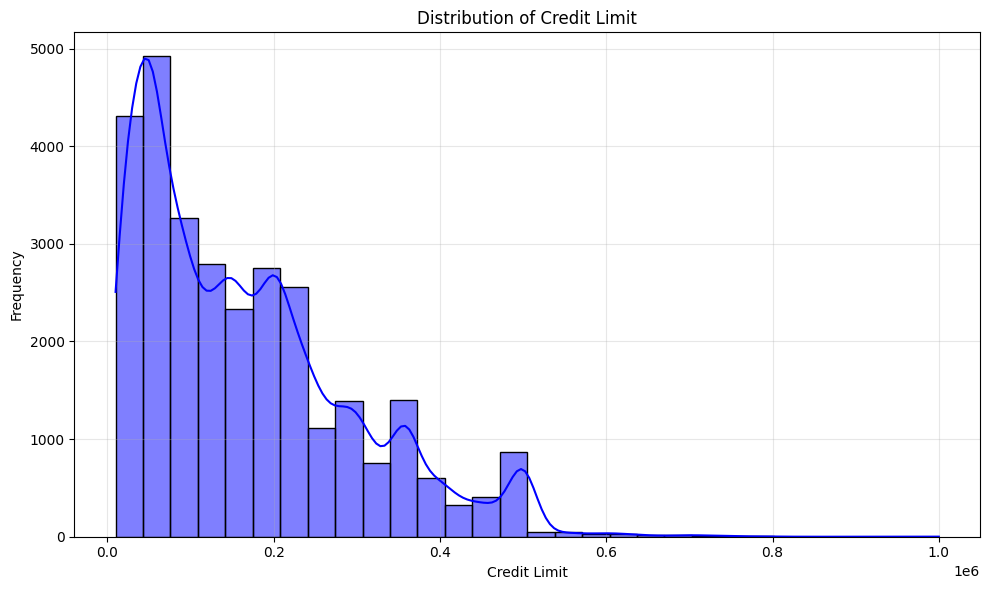

In [14]:
# Distributions of Credit Limit
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Limit'], bins=30, kde=True, color='blue')
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(numerical_visualization_outputs, 'credit_limit_distribution.png'))
plt.show()

- Credit Limit has a right-skewed distribution, indicating that most clients have credit limits below 250,000 NTD, with a long tail suggesting some clients have very high credit limits.

#### **Age Distribution**

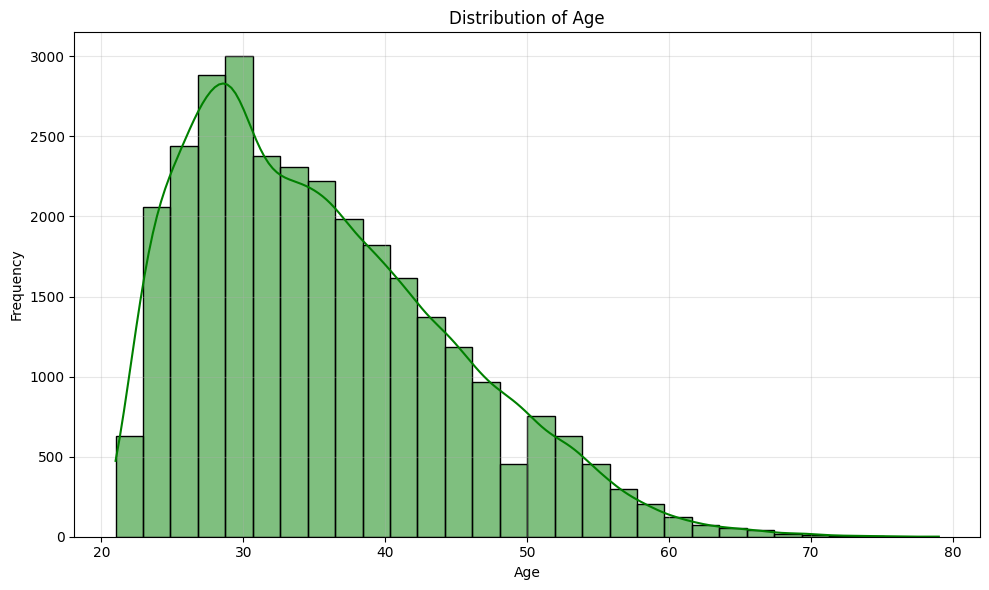

In [15]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(numerical_visualization_outputs, 'age_distribution.png'))
plt.show()

- Age distribution shows a peak around 25-40 years, with a long tail extending to older ages, indicating most clients are relatively young, but there are also older clients.

#### **Bill Amounts Distributions**

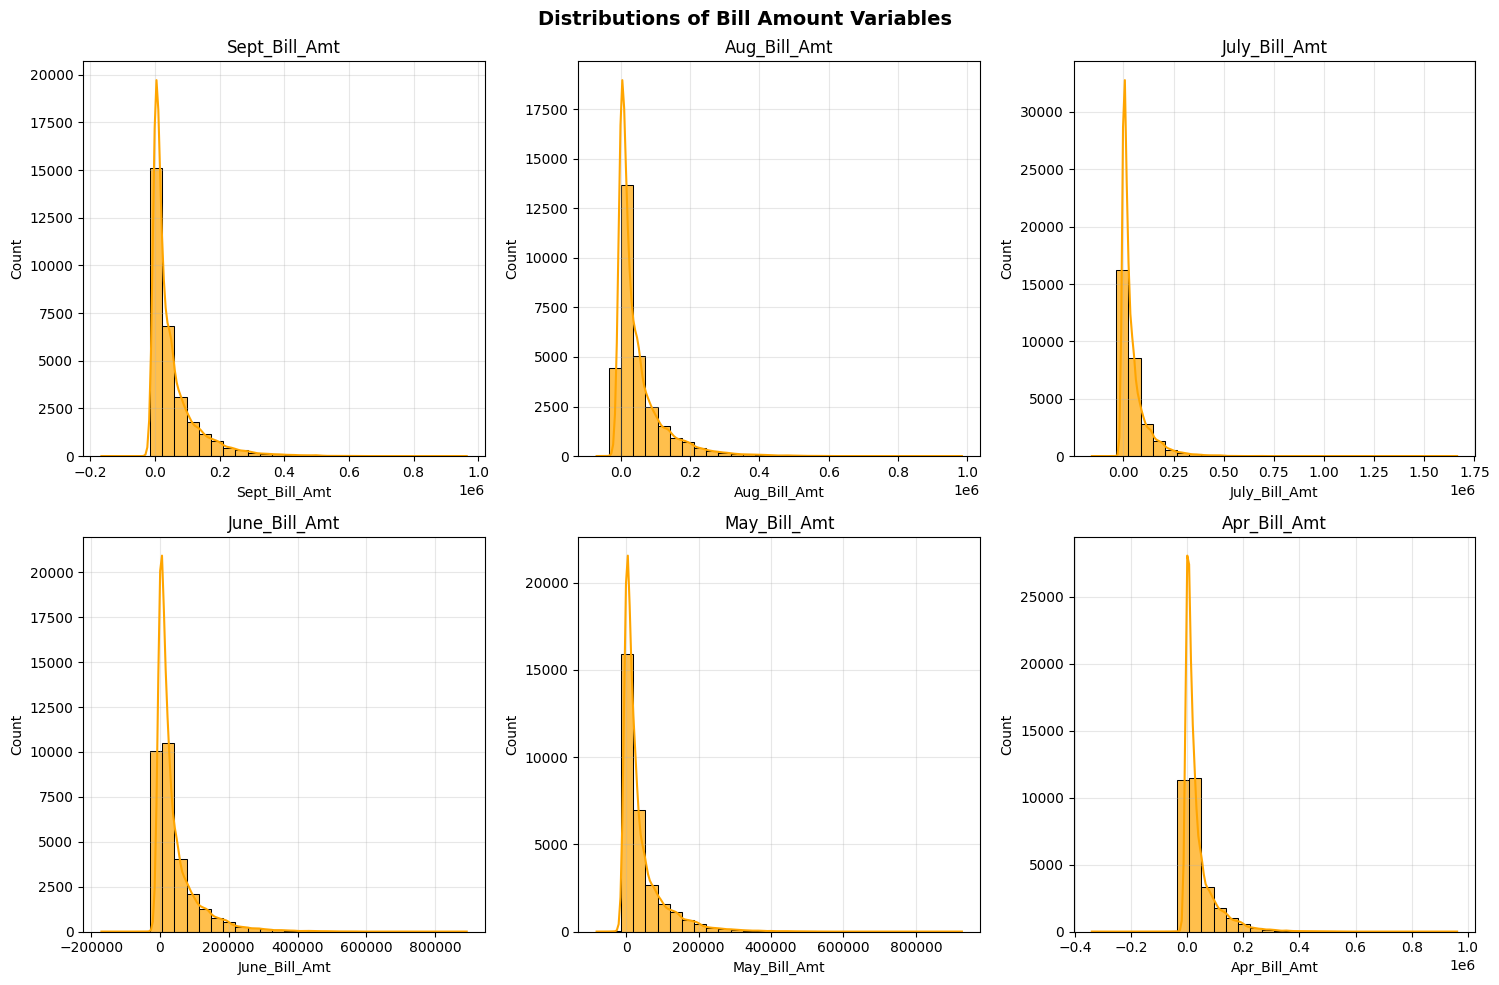

In [16]:
# Grouping bill amounts for visualization
bill_amt_columns = ['Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt', 'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt']

# Distribution of Bill Amounts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distributions of Bill Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(bill_amt_columns):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], color='orange', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(numerical_visualization_outputs, 'bill_amounts_distributions.png'))
plt.show()

- The Bill Amounts (Sept_Bill_Amt to Apr_Bill_Amt) shows a right-skewed distribution, with most clients having bill amounts below 50,000 NTD, but some clients have very high bills, indicating potential outliers or high credit usage.
- Sept_Bill_Amt and June_Bill_Amt have some negative values, indicating overpayments or refunds, while the other months have positive values, suggesting normal billing cycles.
- July_Bill_Amt have some values greater than maximum credit limit (1,000,000 NTD), indicating clients may have defaulted and intrest charges or fees applied.

#### **Payment Amounts Distributions**

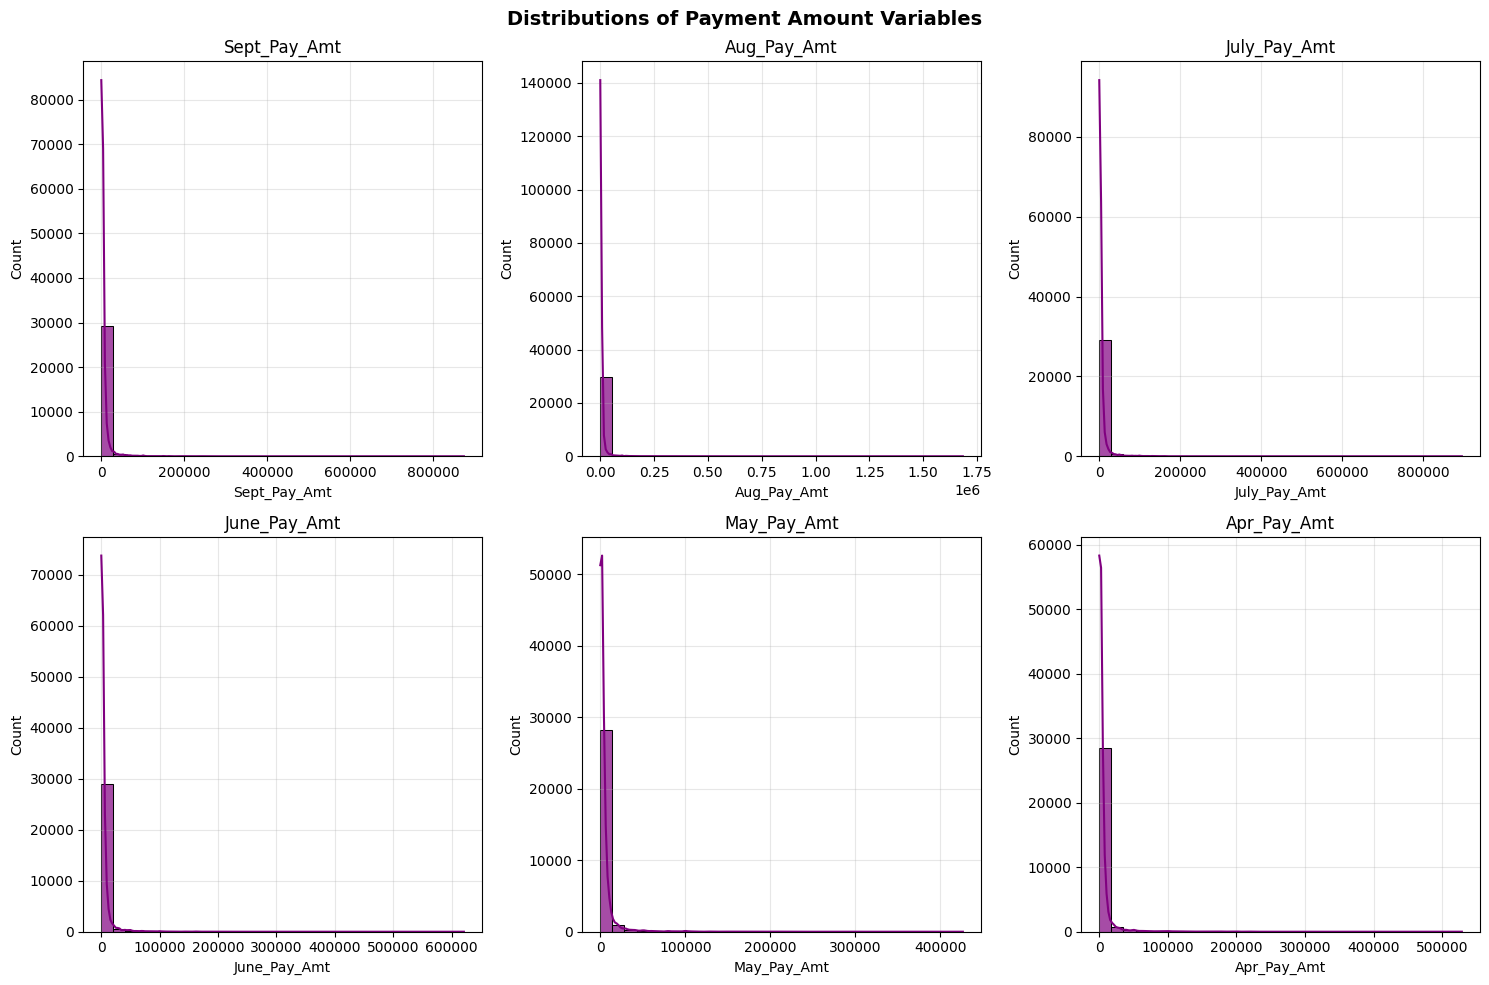

In [17]:
# Grouping payment amounts for visualization
pay_amt_columns = ['Sept_Pay_Amt', 'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt', 'Apr_Pay_Amt']

# Distribution of Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distributions of Payment Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(pay_amt_columns):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], color='purple', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(numerical_visualization_outputs, 'payment_amounts_distributions.png'))
plt.show()

- Pay Amounts also has a Right-skewed distribution, with most clients making payments below 10,000 NTD, but some clients have very high payments, indicating potential outliers or high credit usage.
- Aug_Pay_Amt have some very high values, indicating clients may have made large payments to reduce their credit usage or pay off their bills.

### **Key Observations from Numerical Features**

- **Credit Limit**
    - Credit_Limit ranges from 10,000 to 1,000,000 NTD, with a median around 150,000 NTD indicating 50% of clients have credit limits below this value.
    - Credit Limit has a right-skewed distribution, indicating that most clients have credit limits below 250,000 NTD, with a long tail suggesting some clients have very high credit limits.

- **Age**
    - Age ranges from 21 to 79, with a median around 35 years, indicating that 50% of clients are below this age.
    - Age distribution shows a peak around 25-40 years, with a long tail extending to older ages, indicating most clients are relatively young, but there are also older clients.

- **Bill Amounts**
    - The Bill Amounts (Sept_Bill_Amt to Apr_Bill_Amt) shows a right-skewed distribution, with most clients having bill amounts below 50,000 NTD, but some clients have very high bills, indicating potential outliers or high credit usage.
    - Sept_Bill_Amt and June_Bill_Amt have some negative values, indicating overpayments or refunds, while the other months have positive values, suggesting normal billing cycles.
    - July_Bill_Amt has some values greater than maximum credit limit (1,000,000 NTD), indicating some type of error or bank fees or interest charges are applied.
- **Payment Amounts**
    - Pay Amounts also has a Right-skewed distribution, with most clients making payments below 10,000 NTD, but some clients have very high payments, indicating potential outliers or high credit usage.
    - Aug_Pay_Amt have some very high values, indicating clients may have made large payments to reduce their credit usage or pay off their bills.

## **2.2 Categorical Features**

In [18]:
# Defining categorical columns based on dataset information
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay', 'Apr_Pay']

# Displaying unique values in each categorical column
for col in categorical_columns:
    print(f"{col}: {df[col].unique().tolist()}")

Gender: [2, 1]
Education_Level: [2, 1, 3, 5, 4, 6, 0]
Marital_Status: [1, 2, 3, 0]
Sept_Pay: [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
Aug_Pay: [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
July_Pay: [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
June_Pay: [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
May_Pay: [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
Apr_Pay: [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]


- Education_Level has unexpected value (0) that may need cleaning.
- Marital_Status includes 0, which may represent missing or undefined status.
- Sept_Pay to Apr_Pay columns include values like -2 and 0, which may need clarification. As it is not defined in the dataset information.

### **Visualizing Distributions of Categorical Variables**

In [19]:
# Createing categorical visualization outputs directory
categorical_visualization_outputs = os.path.join(visualization_outputs, "categorical_distributions")
os.makedirs(categorical_visualization_outputs, exist_ok=True)

#### **Demographic Variables Distribution**

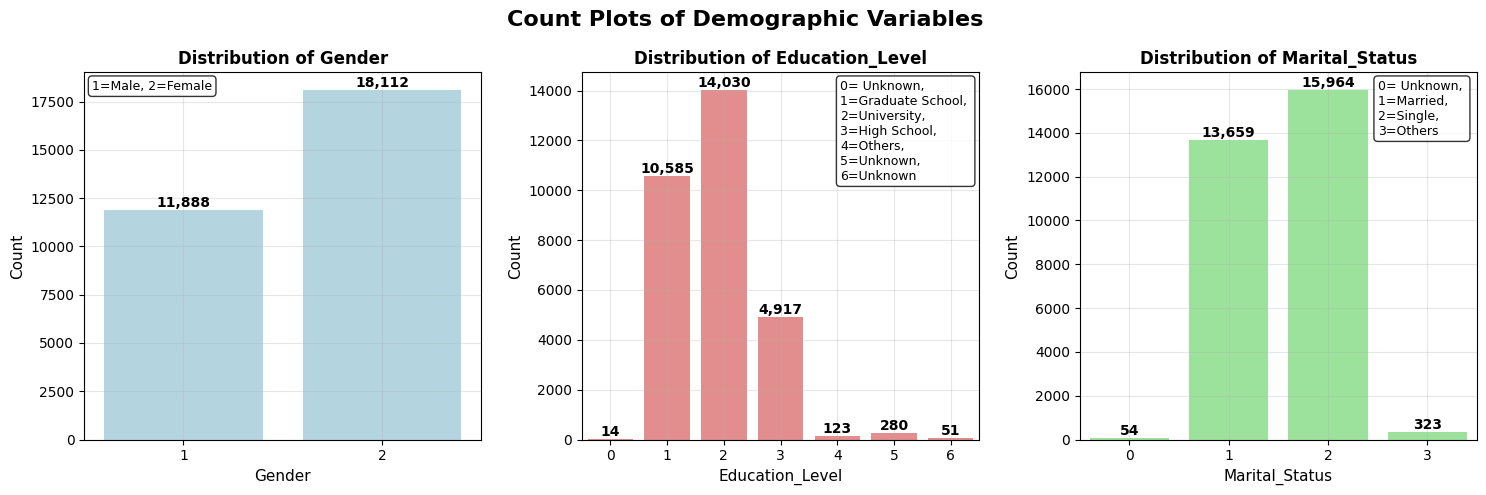

In [20]:
# Grouping demographic variables for visualization
demographic_columns = ['Gender', 'Education_Level', 'Marital_Status']

# Count plots for Demographic Variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Count Plots of Demographic Variables', fontsize=16, fontweight='bold')

colors_demo = ['lightblue', 'lightcoral', 'lightgreen']

# Define information for each demographic variable
info_boxes = {
    'Gender': '1=Male, 2=Female',
    'Education_Level': '0= Unknown, \n1=Graduate School, \n2=University,\n3=High School,\n4=Others,\n5=Unknown, \n6=Unknown',
    'Marital_Status': '0= Unknown, \n1=Married, \n2=Single, \n3=Others'
}

for i, col in enumerate(demographic_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color=colors_demo[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)
    axes[i].grid(True, alpha=0.3)
    
    # Add count values on top of bars
    for p in axes[i].patches:
        height = int(p.get_height())
        axes[i].annotate(f'{height:,}', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Add information box for each variable with custom positioning
    if col == 'Gender':
        # Keep Gender info box at top-left
        pos_x, pos_y = 0.02, 0.98
    elif col == 'Education_Level':
        # Education_Level info box to top-right
        pos_x, pos_y = 0.65, 0.98
    else:  # Marital_Status
        # Move Marital_Status info box further right in top-right corner
        pos_x, pos_y = 0.75, 0.98
        
    axes[i].text(pos_x, pos_y, info_boxes[col], 
                transform=axes[i].transAxes, 
                fontsize=9, 
                verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor='black'))

plt.tight_layout()
plt.savefig(os.path.join(categorical_visualization_outputs, 'demographic_variables_distributions.png'))
plt.show()

- Gender Distribution shows that most of the credit card owners are females (around 60%) compared to males (around 40%).
- Education Level Distribution shows that most credit card owners have university education level or graduate school, with a small percentage having high school or lower education levels.
- Marital Status Distribution shows that most credit card owners are single, followed by married. A small percentage have undefined marital status.

#### **Payment Status Distribution**

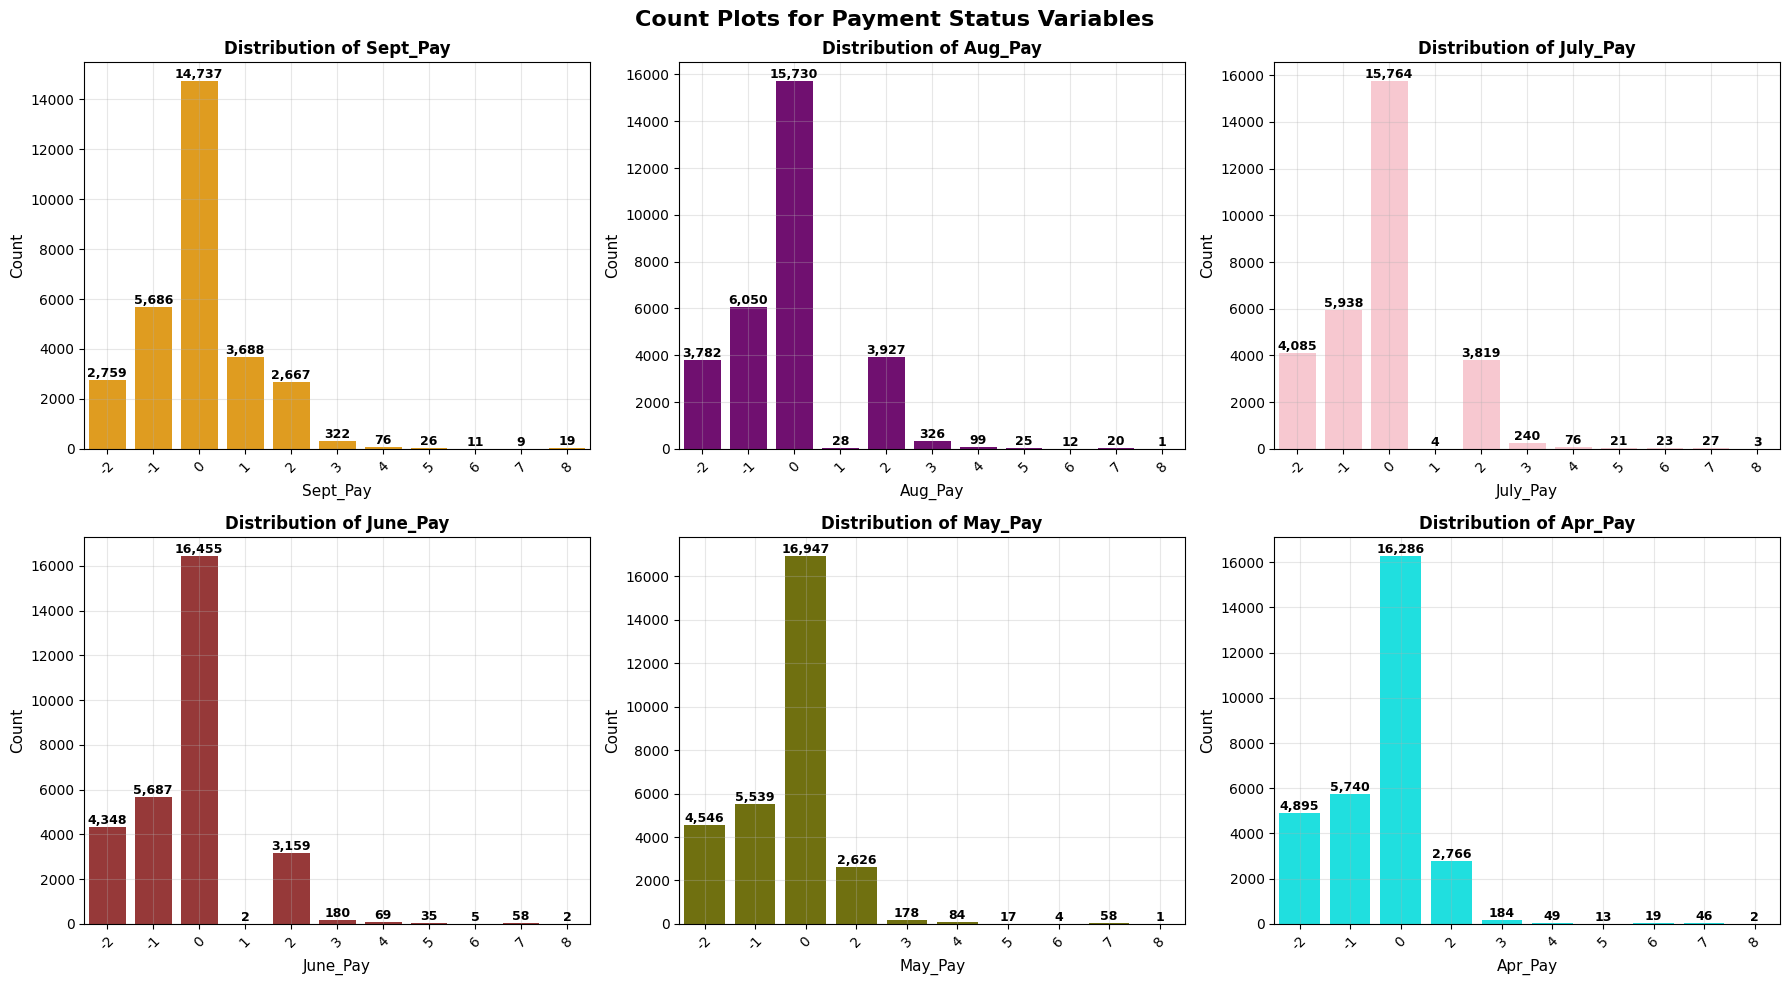

In [21]:
# Grouping payment status variables for visualization
payment_status_columns = ['Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay', 'Apr_Pay']

# Count plots for Payment Status Variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Count Plots for Payment Status Variables', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes = axes.flatten()
colors_payment = ['orange', 'purple', 'pink', 'brown', 'olive', 'cyan']

for i, col in enumerate(payment_status_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color=colors_payment[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)
    axes[i].grid(True, alpha=0.3)
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add count values on top of bars
    for p in axes[i].patches:
        height = int(p.get_height())
        axes[i].annotate(f'{height:,}', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(categorical_visualization_outputs, 'payment_status_distributions.png'))
plt.show()

- All months payment status show that most clients pay on time (-1, 0). Payment delays of 1-2 months are common (1, 2).
- The presence of -2 values indicates "no consumption" periods, which may need clarification.
- Payment patterns are relatively consistent across months, with most of the clients are maintaining good payment behavior.

### **Key Observations from Categorical Features**

- **Demographic Variables:**
    - Gender Distribution shows that most of the credit card owners are females (around 60%) compared to males (around 40%).
    - Education Level Distribution shows that most credit card owners have university education level or graduate school, with a small percentage having high school or lower education levels.
    - Marital Status Distribution shows that most credit card owners are single, followed by married. A small percentage have undefined marital status.

- **Payment Status Variables (Sept_Pay to Apr_Pay):**
    - All months payment status show that most clients pay on time (-1, 0). Payment delays of 1-2 months are common (1, 2).
    - The presence of -2 values indicates "no consumption" periods, which may need clarification.
    - Payment patterns are relatively consistent across months, with most of the clients are maintaining good payment behavior.

## **2.3 Target Variable**

In [22]:
# Defining target column
target_column = 'default_payment_next_month'

# Displaying the distribution of the target variable
df[target_column].value_counts(normalize=True) * 100

default_payment_next_month
0    77.88
1    22.12
Name: proportion, dtype: float64

- default_payment_next_month (target variable) is imbalanced with 77.88% 0s and 22.12% 1s, suggesting a need for handling imbalance later.

### **Visualizing Distributions of Target Variable**

In [23]:
# Createing target visualization outputs directory
target_visualization_outputs = os.path.join(visualization_outputs, "target_distributions")
os.makedirs(target_visualization_outputs, exist_ok=True)

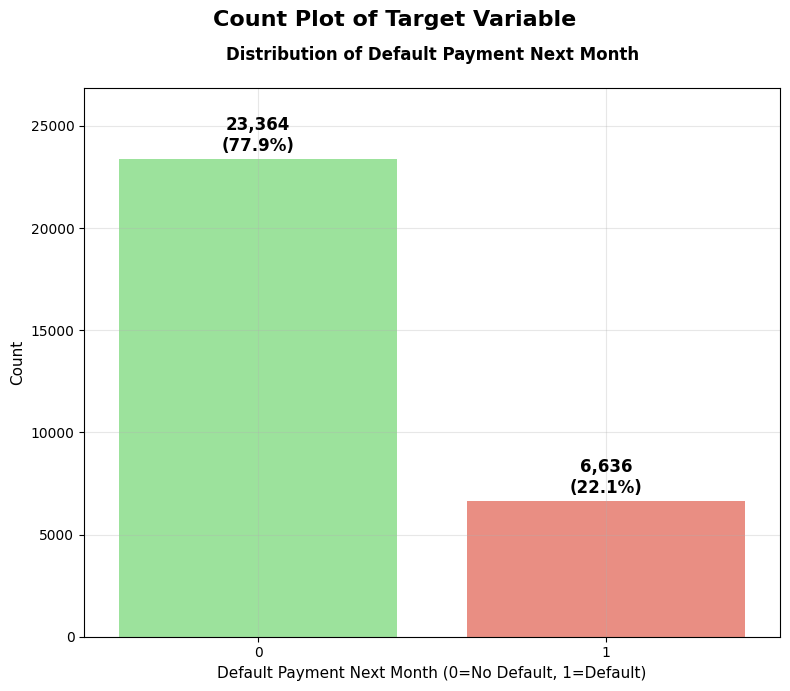

In [24]:
# Count plot for Target Variable
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
fig.suptitle('Count Plot of Target Variable', fontsize=16, fontweight='bold')

sns.countplot(data=df, x=target_column, ax=ax, palette=['lightgreen', 'salmon'])
ax.set_title('Distribution of Default Payment Next Month', fontsize=12, fontweight='bold', pad=20)
ax.set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=11)
ax.set_ylabel('Count', fontsize=11)
ax.grid(True, alpha=0.3)

# Add count values and percentages on top of bars
total_count = len(df)
for p in ax.patches:
    height = int(p.get_height())
    percentage = (height / total_count) * 100
    ax.annotate(f'{height:,}\n({percentage:.1f}%)', 
               (p.get_x() + p.get_width()/2., p.get_height() + 200), 
               ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adjust y-axis limit to accommodate annotations
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)

plt.tight_layout()
plt.savefig(os.path.join(target_visualization_outputs, 'target_variable_distribution.png'))
plt.show()

- The target variable is binary, with 0 indicating no default and 1 indicating default, which is consistent with the expected format for binary classification tasks.
- The distribution of target variable default payment next month shows that 77.9% of clients do not default (0) and 22.1% do default (1), indicating a significant class imbalance.
- This imbalance may affect model performance, so techniques like oversampling, undersampling, and using appropriate evaluation metrics will be necessary.

## **Key Observations from Understanding Variables**

- **Variable Overview**:
    - **ID**: Unique identifier (we will not use for modeling).
    - **Credit_Limit**: Credit limit (continuous, float64).
    - **Gender, Education_Level, Marital_Status**: Categorical variables encoded as integers.
    - **Age**: Continuous, integer.
    - **Sept_Pay to Apr_Pay**: Payment status (ordinal, e.g., -1, 0, 1, 2 indicating months of delay or paid).
    - **Sept_Bill_Amt to Apr_Bill_Amt**: Bill amounts for six months (float64).
    - **Sept_Pay_Amt to Apr_Pay_Amt**: Payment amounts for six months (float64).
    - **default_payment_next_month**: Target variable (0 = no default, 1 = default, int64).

- **Numerical Variables**:
    - **Credit Limit**
        - Credit_Limit ranges from 10,000 to 1,000,000 NTD, with a median around 150,000 NTD indicating 50% of clients have credit limits below this value.
        - Credit Limit has a right-skewed distribution, indicating that most clients have credit limits below 250,000 NTD, with a long tail suggesting some clients have very high credit limits.

    - **Age**
        - Age ranges from 21 to 79, with a median around 35 years, indicating that 50% of clients are below this age.
        - Age distribution shows a peak around 25-40 years, with a long tail extending to older ages, indicating most clients are relatively young, but there are also older clients.

    - **Bill Amounts (Sept_Bill_Amt to Apr_Bill_Amt)**
        - The Bill Amounts (Sept_Bill_Amt to Apr_Bill_Amt) shows a right-skewed distribution, with most clients having bill amounts below 50,000 NTD, but some clients have very high bills, indicating potential outliers or high credit usage.
        - Sept_Bill_Amt and June_Bill_Amt have some negative values, indicating overpayments or refunds, while the other months have positive values, suggesting normal billing cycles.
        - July_Bill_Amt has some values greater than maximum credit limit (1,000,000 NTD), indicating some type of error or bank fees or interest charges are applied.

    - **Payment Amounts (Sept_Pay_Amt to Apr_Pay_Amt)**
        - Pay Amounts also has a Right-skewed distribution, with most clients making payments below 10,000 NTD, but some clients have very high payments, indicating potential outliers or high credit usage.
        - Aug_Pay_Amt have some very high values, indicating clients may have made large payments to reduce their credit usage or pay off their bills.

- **Categorical Variables**: 
    - **Demographic Variables:**
        - Gender Distribution shows that most of the credit card owners are females (around 60%) compared to males (around 40%).
        - Education Level Distribution shows that most credit card owners have university education level or graduate school, with a small percentage having high school or lower education levels.
        - Marital Status Distribution shows that most credit card owners are single, followed by married. A small percentage have undefined marital status.

    - **Payment Status Variables (Sept_Pay to Apr_Pay):**
        - All months payment status show that most clients pay on time (-1, 0). Payment delays of 1-2 months are common (1, 2).
        - The presence of -2 values indicates "no consumption" periods, which may need clarification.
        - Payment patterns are relatively consistent across months, with most of the clients are maintaining good payment behavior.

- **Target Variable**:
    - The target variable is binary, with 0 indicating no default and 1 indicating default, which is consistent with the expected format for binary classification tasks.
    - The distribution of target variable default payment next month shows that 77.9% of clients do not default (0) and 22.1% do default (1), indicating a significant class imbalance.
    - This imbalance may affect model performance, so techniques like oversampling, undersampling, and using appropriate evaluation metrics will be necessary.

# **3. Identifying Outliers**

In [25]:
# Detecting Outliers in Numerical Variables using IQR Method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# Checking for outliers in each numerical column
for col in numerical_columns:
    outlier_count, lower, upper = detect_outliers(df, col)
    total_count = len(df[col])
    outlier_percentage = (outlier_count / total_count) * 100
    print(f"\n{col}: {outlier_count} outliers ({outlier_percentage:.2f}%) \n[Lower bound: {round(lower)}, Upper bound: {round(upper)}]")


Credit_Limit: 167 outliers (0.56%) 
[Lower bound: -235000, Upper bound: 525000]

Age: 272 outliers (0.91%) 
[Lower bound: 8, Upper bound: 60]

Sept_Bill_Amt: 2400 outliers (8.00%) 
[Lower bound: -91740, Upper bound: 162389]

Aug_Bill_Amt: 2395 outliers (7.98%) 
[Lower bound: -88548, Upper bound: 155538]

July_Bill_Amt: 2469 outliers (8.23%) 
[Lower bound: -83582, Upper bound: 146412]

June_Bill_Amt: 2622 outliers (8.74%) 
[Lower bound: -75942, Upper bound: 132775]

May_Bill_Amt: 2725 outliers (9.08%) 
[Lower bound: -70878, Upper bound: 122832]

Apr_Bill_Amt: 2693 outliers (8.98%) 
[Lower bound: -70657, Upper bound: 121112]

Sept_Pay_Amt: 2745 outliers (9.15%) 
[Lower bound: -5009, Upper bound: 11015]

Aug_Pay_Amt: 2714 outliers (9.05%) 
[Lower bound: -5418, Upper bound: 11250]

July_Pay_Amt: 2598 outliers (8.66%) 
[Lower bound: -5782, Upper bound: 10678]

June_Pay_Amt: 2994 outliers (9.98%) 
[Lower bound: -5280, Upper bound: 9589]

May_Pay_Amt: 2945 outliers (9.82%) 
[Lower bound: -54

- **Low Outlier Percentages:** Credit_Limit (0.56%) and Age (0.91%) have minimal outliers, suggesting good data integrity overall.
- **High Outlier Percentages:** BILL_AMT (8–9%) and PAY_AMT (8.66–9.98%) have significant outliers, reflecting the dataset’s natural variability in credit usage and payments.
- **Negative Values:**
    - Negative BILL_AMT outliers are valid (overpayments).
- **AGE Outliers:** Values above 60.50 are likely fine.

In [26]:
# Createing outliers visualization outputs directory
outliers_visualization_outputs = os.path.join(visualization_outputs, "outliers_distributions")
os.makedirs(outliers_visualization_outputs, exist_ok=True)

## **Visualizing Outliers in Credit Limit**

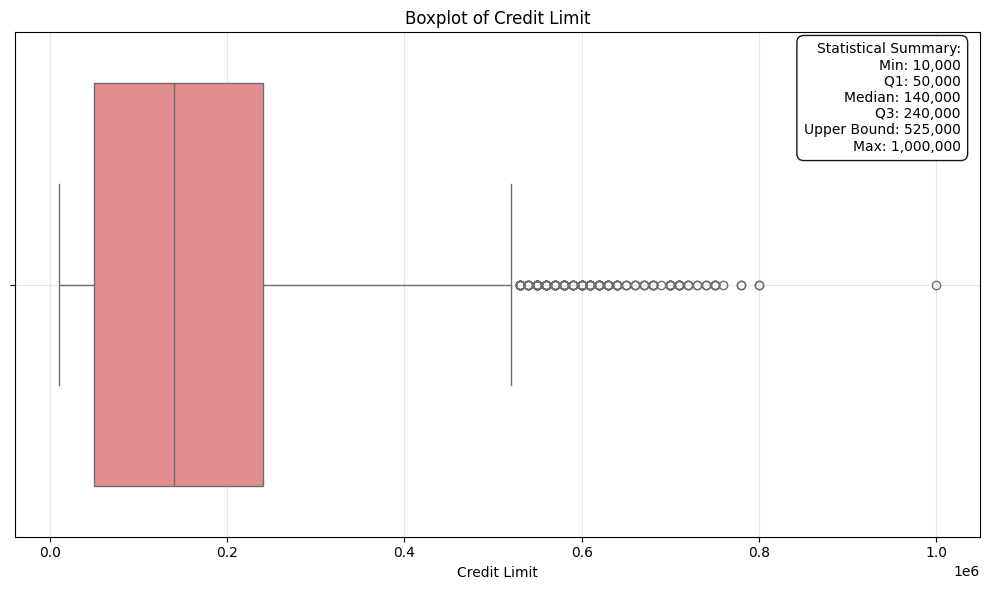

In [27]:
# Boxplot for Credit Limit
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Credit_Limit'], color='lightcoral')
plt.title('Boxplot of Credit Limit')
plt.xlabel('Credit Limit')
plt.grid(True, alpha=0.3)

# Calculate statistical values for the information box
Q1 = df['Credit_Limit'].quantile(0.25)
Q3 = df['Credit_Limit'].quantile(0.75)
IQR = Q3 - Q1
median = df['Credit_Limit'].median()
min_val = df['Credit_Limit'].min()
max_val = df['Credit_Limit'].max()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create information box text with conditional bounds
info_lines = [
    "Statistical Summary:",
    f"Min: {min_val:,.0f}"
]

# Add lower bound only if it's less than min
if min_val >= lower_bound:
    pass  # Don't display lower bound
else:
    info_lines.append(f"Lower Bound: {lower_bound:,.0f}")

info_lines.extend([
    f"Q1: {Q1:,.0f}",
    f"Median: {median:,.0f}",
    f"Q3: {Q3:,.0f}"
])

# Add upper bound only if it's greater than max
if max_val <= upper_bound:
    pass  # Don't display upper bound
else:
    info_lines.append(f"Upper Bound: {upper_bound:,.0f}")

info_lines.append(f"Max: {max_val:,.0f}")

# Join all lines with newlines
info_text = "\n".join(info_lines)

# Add information box to top-right corner
plt.gca().text(0.98, 0.98, info_text, 
               transform=plt.gca().transAxes, 
               fontsize=10, 
               verticalalignment='top',
               horizontalalignment='right',
               bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9, edgecolor='black'))

plt.tight_layout()
plt.savefig(os.path.join(outliers_visualization_outputs, 'credit_limit_boxplot.png'))
plt.show()

- The box plot shows that Credit Limit has a few outliers above 525,000 NTD, but 75% of clients have credit limits below 240,000 NTD, indicating only 25% of clients have credit limits above 240,000 NTD.
- Middle 50% of clients have credit limits between 50,000 and 240,000 NTD, with a median around 150,000 NTD.

## **Visualizing Outliers in Age**

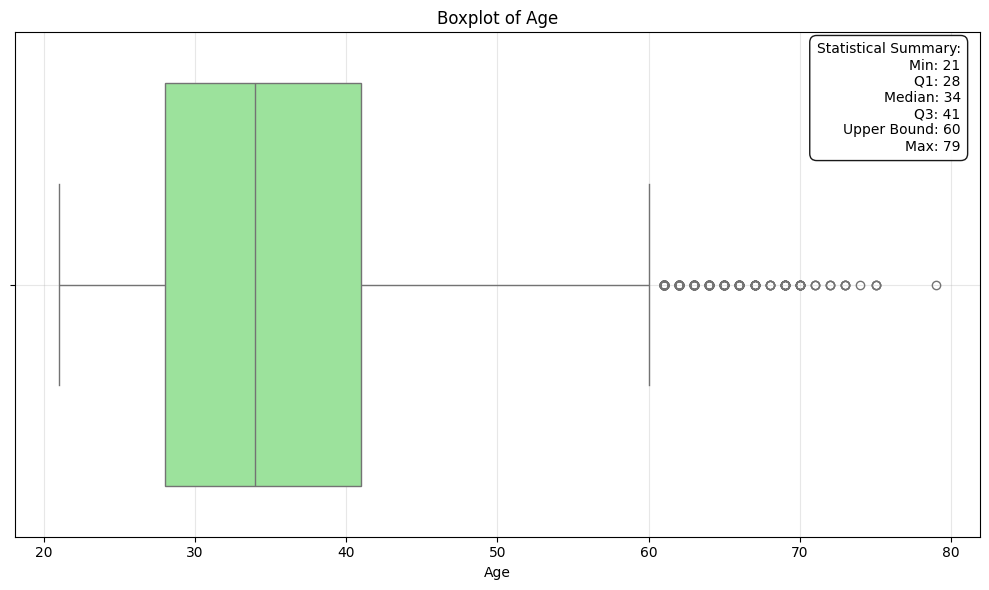

In [28]:
# Boxplot for Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True, alpha=0.3)

# Calculate statistical values for the information box
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
median = df['Age'].median()
min_val = df['Age'].min()
max_val = df['Age'].max()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create information box text with conditional bounds
info_lines = [
    "Statistical Summary:",
    f"Min: {min_val:,.0f}"
]

# Add lower bound only if it's less than min
if min_val >= lower_bound:
    pass  # Don't display lower bound
else:
    info_lines.append(f"Lower Bound: {lower_bound:,.0f}")

info_lines.extend([
    f"Q1: {Q1:,.0f}",
    f"Median: {median:,.0f}",
    f"Q3: {Q3:,.0f}"
])

# Add upper bound only if it's greater than max
if max_val <= upper_bound:
    pass  # Don't display upper bound
else:
    info_lines.append(f"Upper Bound: {upper_bound:,.0f}")

info_lines.append(f"Max: {max_val:,.0f}")

# Join all lines with newlines
info_text = "\n".join(info_lines)

# Add information box to top-right corner
plt.gca().text(0.98, 0.98, info_text, 
               transform=plt.gca().transAxes, 
               fontsize=10, 
               verticalalignment='top',
               horizontalalignment='right',
               bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9, edgecolor='black'))

plt.tight_layout()
plt.savefig(os.path.join(outliers_visualization_outputs, 'age_boxplot.png'))
plt.show()

- The boxplot shows that the majority of credit card owner are between 28 and 41 years old, with a few outliers above 60 years old.
- The median age is 34 years, indicating that 50% of clients are below this age.

## **Visualizing Outliers in Bill Amounts**

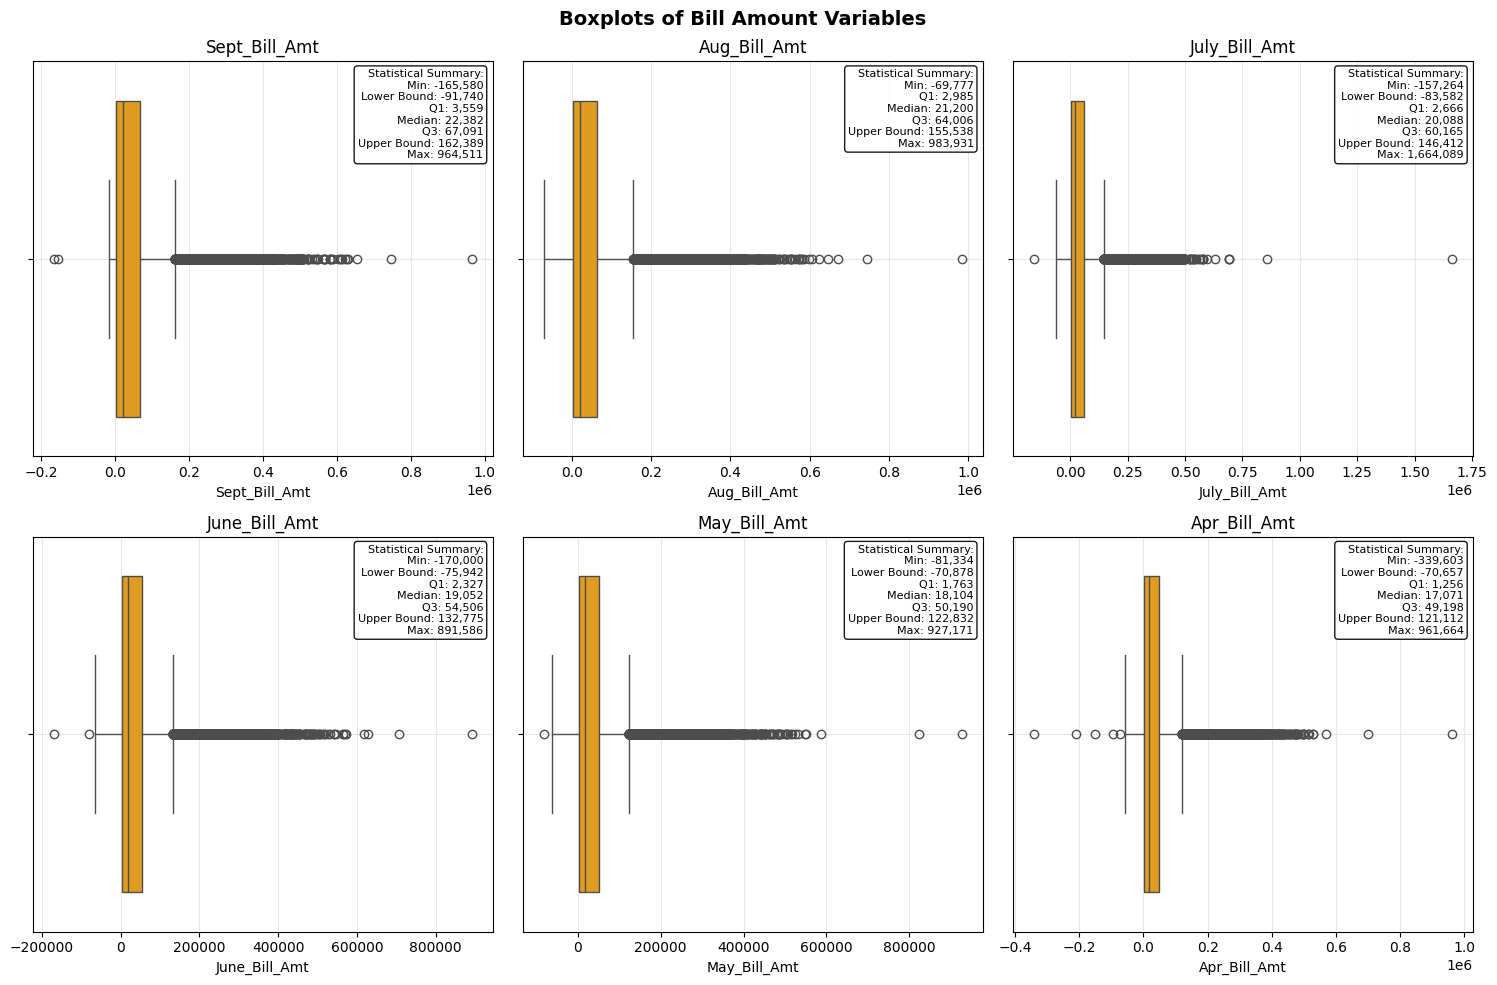

In [29]:
# Boxplots for Bill Amounts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Boxplots of Bill Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(bill_amt_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True, alpha=0.3)
    
    # Calculate statistical values for the information box
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    median = df[col].median()
    min_val = df[col].min()
    max_val = df[col].max()
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create information box text with conditional bounds
    info_lines = [
        "Statistical Summary:",
        f"Min: {min_val:,.0f}"
    ]
    
    # Add lower bound only if it's less than min
    if min_val >= lower_bound:
        pass  # Don't display lower bound
    else:
        info_lines.append(f"Lower Bound: {lower_bound:,.0f}")
    
    info_lines.extend([
        f"Q1: {Q1:,.0f}",
        f"Median: {median:,.0f}",
        f"Q3: {Q3:,.0f}"
    ])
    
    # Add upper bound only if it's greater than max
    if max_val <= upper_bound:
        pass  # Don't display upper bound
    else:
        info_lines.append(f"Upper Bound: {upper_bound:,.0f}")
    
    info_lines.append(f"Max: {max_val:,.0f}")
    
    # Join all lines with newlines
    info_text = "\n".join(info_lines)
    
    # Add information box to top-right corner of each subplot
    axes[i].text(0.98, 0.98, info_text, 
                 transform=axes[i].transAxes, 
                 fontsize=8, 
                 verticalalignment='top',
                 horizontalalignment='right',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='black'))

plt.tight_layout()
plt.savefig(os.path.join(outliers_visualization_outputs, 'bill_amounts_boxplots.png'))
plt.show()

## **Visualizing Outliers in Payment Amounts**

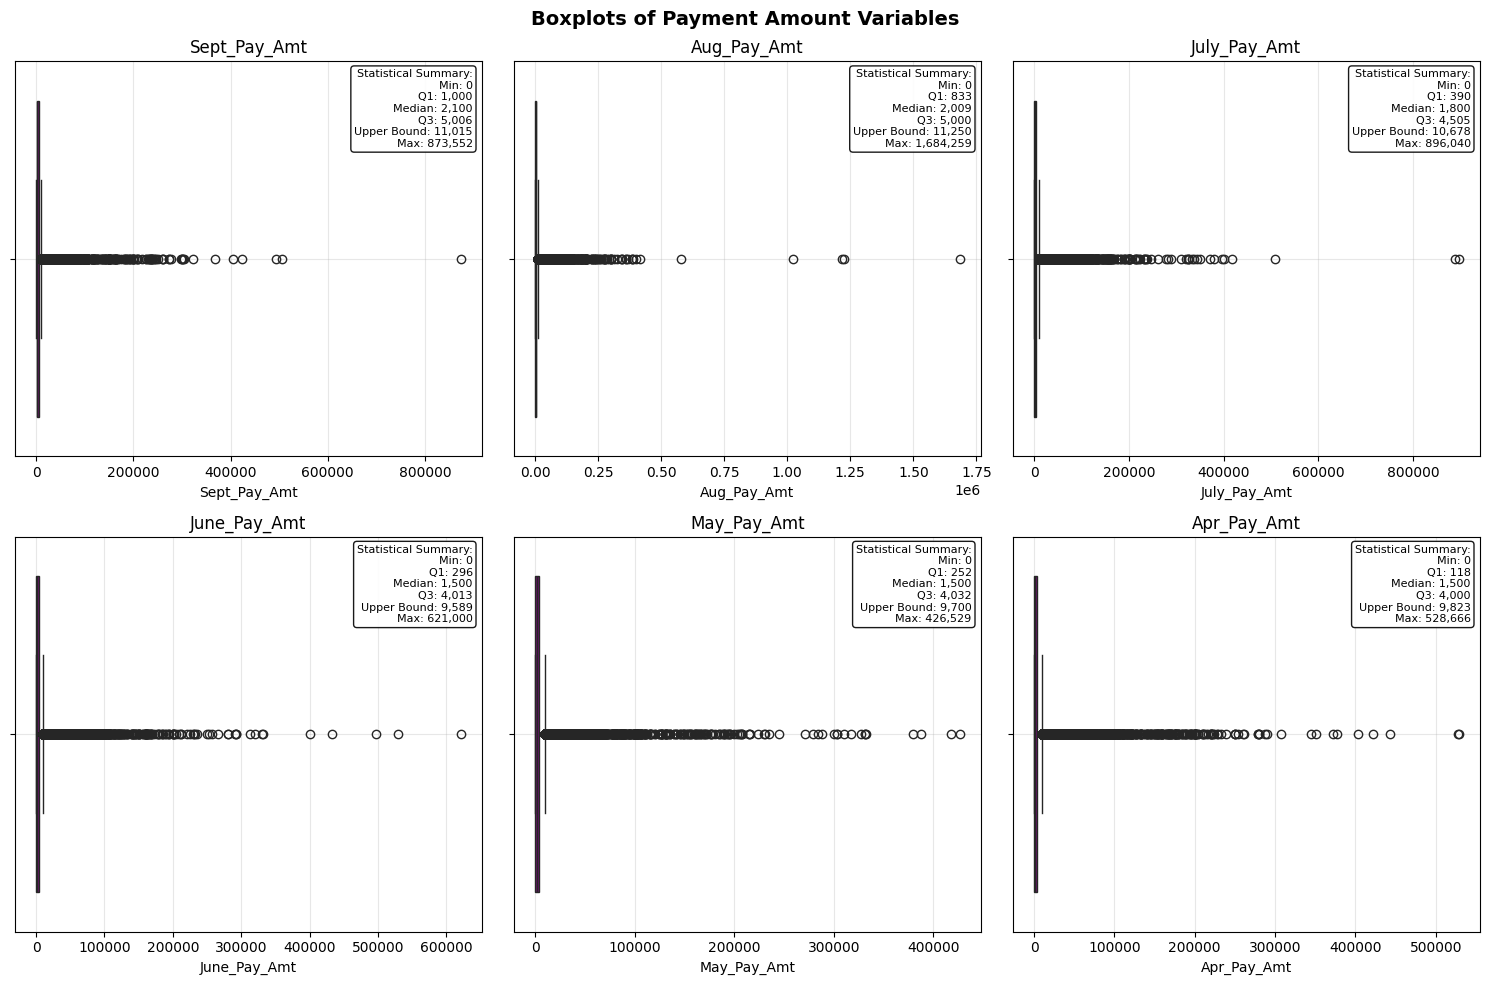

In [30]:
# Boxplots for Payment Amounts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Boxplots of Payment Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(pay_amt_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='purple')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True, alpha=0.3)
    
    # Calculate statistical values for the information box
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    median = df[col].median()
    min_val = df[col].min()
    max_val = df[col].max()
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create information box text with conditional bounds
    info_lines = [
        "Statistical Summary:",
        f"Min: {min_val:,.0f}"
    ]
    
    # Add lower bound only if it's less than min
    if min_val >= lower_bound:
        pass  # Don't display lower bound
    else:
        info_lines.append(f"Lower Bound: {lower_bound:,.0f}")
    
    info_lines.extend([
        f"Q1: {Q1:,.0f}",
        f"Median: {median:,.0f}",
        f"Q3: {Q3:,.0f}"
    ])
    
    # Add upper bound only if it's greater than max
    if max_val <= upper_bound:
        pass  # Don't display upper bound
    else:
        info_lines.append(f"Upper Bound: {upper_bound:,.0f}")
    
    info_lines.append(f"Max: {max_val:,.0f}")
    
    # Join all lines with newlines
    info_text = "\n".join(info_lines)
    
    # Add information box to top-right corner of each subplot
    axes[i].text(0.98, 0.98, info_text, 
                 transform=axes[i].transAxes, 
                 fontsize=8, 
                 verticalalignment='top',
                 horizontalalignment='right',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, edgecolor='black'))

plt.tight_layout()
plt.savefig(os.path.join(outliers_visualization_outputs, 'payment_amounts_boxplots.png'))
plt.show()

## **Key Observations from Outliers Analysis**

#**Assumptions for this Project**
- Based on these assumptions, we will clean and analyze the dataset accordingly.
    - Assuming `0` in Marital_Status represents missing values.
    - Assuming `0` in Education_Level represents unknown (missing values).
    - Assuming (`5` and `6`) values in Education_Level both are same and not a typing error in the dataset documentation as both are (unknown) according to the documentation. So we will replace `6` in Education_Level with `5`(unknown).
    - Assuming `-2` in Payment Status columns represent "no consumption" or "no credit usage" for those months.
    - Assuming `0` in Payment Status columns represent "paid on time" with 0 months of delay.

# **Key Insights from Data Quality Check**
- **Missing Values:** 
    - Education_Level and Marital_Status have missing values which need to be addressed.
- **Update Expected Ranges:**
    - In Apr_Pay to Sept_Pay (value `-2`) is valid (no consumption) we can update expected ranges.
    - In Apr_Pay to Sept_Pay (value `0`) is valid (paid on time) we can update expected ranges.
    - In Education_Level, we will replace `6` with `5` (unknown) to maintain consistency.
- **Outliers:** 
    - Bill_Amt and Pay_Amt have high outlier percentages; Credit_Limit and Age have low outlier percentages.
- **Action Items:** 
    - Handle missing values in Education_Level and Marital_Status in the Data Cleaning phase.
    - Handle Bill_Amt and Pay_Amt outliers in the Data Cleaning phase.

## **Summary of Data Exploration**
- **Dataset Overview:**
    - The dataset contains records of 30,000 credit card clients with 25 attributes, including demographic information, credit history, payment behavior and the target variable (default_payment_next_month) indicates whether a client will default on their payment in the next month. our dataset is well-structured with no missing values, or incorrect data types ensuring data integrity for analysis and modeling.
    - There are no duplicate rows in the dataset, as we have `ID` column which is unique for each row. So after dropping the ID column in Data Cleaning phase, we will once again check for duplicates.
- **Variable Understanding:**
    - The dataset includes a mix of categorical, ordinal, and continuous variables, with some unexpected values in categorical variables such as Education Level and Marital Status that have 0 values indicating missing or unknown status and Payment Status columns (Sept_Pay to Apr_Pay) that have -2 and 0 values indicating "no consumption" or "no payment required for no credit usage" respectively that needs to be handled.
    - The target variable (default_payment_next_month) is imbalanced with 77.88% 0 (no default) and 22.12% 1(default), suggesting a need for handling imbalance for modeling.
    - We have renamed the columns names such as changing "PAY_0" to "Sept_Pay", and "BILL_AMT1" to "Sept_Bill_Amt" based on dataset information to make them more interpretable.
- **Data Quality Check:**
    - The dataset looks complete, as there are no missing values. But there are some potential data quality issues to address which we found during understanding variables:
        - Education Level has unexpected value (0) that may indicate missing or unknown education level.
        - Marital Status includes 0, which may represent missing or undefined status.
        - Payment Status columns (Sept_Pay to Apr_Pay) include values like -2, which may represent missing or undefined status.
        - In Education Level both values 5 and 6 are marked as (unknown) according to the dataset documentation, so we will replace 6 with 5 to maintain consistency.
    - Bill Amounts (BILL_AMT) and Payment Amounts (PAY_AMT) have high outlier percentages, while Credit Limit and Age have low outlier percentages which need to be handled or we should use tree-based models that are robust to outliers.
    - We will need to clean these columns to ensure accurate modeling.
- **Assumptions:**
    - We have made some assumptions based on the dataset information and domain knowledge, such as assuming 0 in Marital_Status represents missing values, 0 in Education_Level represents unknown (missing values), -2 in Payment Status columns represent "no consumption" or "no credit usage" for those months, and 0 in Payment Status columns represent "paid on time" with 0 months of delay.


# **4. Analyzing Feature Relationships**

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(20, 12))
correlation_matrix = df.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.savefig(os.path.join(visualization_outputs, 'correlation_heatmap.png'))
plt.tight_layout()
plt.show()

- **Strong positive correlations** exist between bill amounts across different months (0.8-0.95), indicating consistent billing patterns.
- **Payment amounts** show moderate correlations (0.15-0.29), suggesting some consistency in payment behavior but more variability than bill amounts.
- **Credit_Limit** has weak correlations with most variables, making it an independent predictor.
- **Age** shows minimal correlations with financial variables, suggesting limited predictive power.
- **Payment status variables** (Sept_Pay to Apr_Pay) show weak to moderate correlations, indicating varied payment delay patterns.
- **Target variable** (default_payment_next_month) has weak correlations with most features, suggesting the need for advanced modeling techniques to capture complex relationships.

### **Key Insights from Data Visualization**
- **Distribution Patterns:**
    - All numerical variables show right-skewed distributions requiring log transformation for modeling or using tree based algorithms like Random Forest, Gradient Boosting or XGBoost as they can handle skewed distributions and outliers effectively, making them suitable for this dataset.
    - Credit_Limit and BILL_AMT variables have significant outliers (8-9%) but are valid business cases.
    - Payment amounts (PAY_AMT) show high zero-payment frequency, indicating varied payment behaviors.
- **Class Imbalance:**
    - Target variable shows 77.9% non-defaulters vs 22.1% defaulters, requiring resampling strategies.
    - Gender imbalance exists (around 60% female vs 40% male) but reflects natural customer demographics.
- **Feature Relationships:**
    - Strong correlations within bill amounts (0.6-0.9) suggesting multicollinearity.
    - Payment amounts show moderate correlations (0.3-0.6), indicating more independent behavioral patterns.
    - Credit_Limit and Age are largely independent, providing unique information for modeling.
- **Action Items for Modeling:**
    - We can apply log transformation for skewed numerical variables or use a tree based models which are robust to skewed distributions and outliers.
    - To handle class imbalance, we can use techniques like SMOTE or undersampling.